<a href="https://colab.research.google.com/github/OmarCardoso/Projeto_churn_clientes_ensembles_Luizalabs/blob/main/Projeto_churn_clientes_ensembles_Luizalabs_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Ensembles: Previsão de _Churn_ de Clientes

___


### Author: Omar Cardoso

> #### Steakholders: Tera Data Science / Luizalabs (Magazin Luiza)

#### Setembro de 2022

___


# FASE 1 - SOBRE O PROJETO

## 1.1 -  Contexto do Desafio



## *Churn* de Clientes

O desafio de prever se um cliente irá sair da Base de Clientes Ativos (também conhecido como *churn*) não é um problema exclusivo do varejo, sendo uma área de estudos constante da maioria das indústrias e empresas de serviços que dependem da retenção. 

Esse é um exemplo do tipo de problema que um cientista do *Chapter* de Ciência de Dados do Luizalabs entra de cabeça e cujas soluções servem para alavancar várias frentes de trabalho. A solução em si já traz muito valor, se tiver alto índice de acertos pode ser usada para elencar automaticamente clientes com alto risco de *churn* para uma promoção agressiva com o objetivo retê-lo na base. 

Também há muito valor nos *insights* e na validação de hipóteses que acontece durante o processo de análise do problema e das soluções. Pode-se verificar através de experimentação que, por exemplo, um cliente que compra exclusivamente em datas especiais ou eventos promocionais tem uma chance menor de ser um *churn* do que um que compra grandes volumes do mesmo produto. 

## 1.2 - Objetivos do Desafio

Nesse desafio, construído em uma parceria da **Tera** e o **Luizalabs**, o **objetivo principal** será construir algumas soluções baseadas em *machine learning* para prever se um dado cliente do *e-commerce* do **Magalu** continuará comprando na plataforma em 2020 usando algumas características próprias do cliente e seu histórico de compras no ano anterior. No final, algumas dessas soluções devem ser combinadas em um *ensemble* para criar uma solução única com o objetivo de alavancar ainda mais os resultados.

Para que o **objetivo principal** seja cumprido, será necessário construir uma forma de visualização das soluções criadas e a comparação com o **modelo _baseline_** e com o **modelo de _ensemble_** criados no processo. O formato sugerido é um **tabela de resultados** contendo as métricas de sucesso de cada modelo criado.

O **objetivo secundário** é o levantamento de hipóteses e *insights* que surgirem durante as experimentações. É interessante fazer isso desde o início como parte da análise exploratória, documentando qualquer indício de informação nova sobre o problema. Também é uma boa prática avaliar os modelos treinados, seja através da exploração de seus parâmetros (por exemplo, os pesos de um modelo linear) ou usando técnicas avançadas como o [SHAP](https://www.kaggle.com/dansbecker/shap-values), buscando relacionar como as _features_ influenciam as respostas do modelo.

A forma mais simples de cumprir o **objetivo secundário** é a documentação das etapas de análise e exploração de forma resumida em um relatório que compila as principais hipóteses e _insights_. Esse relatório pode ser um documento de texto na forma de um **diário de bordo** ou mesmo uma **seção do próprio notebook** em que a solução foi desenvolvida.

## 1.3 Pontuação no Desafio

O desafio também possui um **_dataset_ de pontuação**, contendo dados de clientes que não estão nem nas bases de treino nem nas de teste. Para esses clientes não foram disponibilizadas as respostas (_targets_), sendo portanto impossível verificar durante o desenvolvimento da solução se o modelo está acertando ou não. 

O objetivo desse _dataset_ é permitir, de forma justa, que os alunos possam comparar suas melhores soluções com as dos outros. Através desse [_link_](https://forms.gle/9Vb4VDVejXLz6wi67) é possível fazer o envio do **arquivo de respostas** do desafio. No fim do desafio, será mostrado o _ranking_ dos envios dos alunos. 

_Let the Games Begin!_ =

## 1.4 Base de Dados

Todos os dados disponibilizados para esse desafio estão em arquivos no formato **_csv_**, podendo ser baixados para serem trabalhados localmente ou em um notebook do **_Google Colab_** como este aqui. 

Os dados sensíveis ou privados de clientes e produtos estão todos anonimizados, respeitando a privacidade dos mesmos e evitando o vazamento de informações estratégicas da empresa. 

Esses dados anonimizados incluem informações de **IDs de entidades** (clientes, vendas e produtos), os **estados** de origem do cliente e de destino do produto e a **estrutura mercadológica** dos produtos (nomes de categorias e subcategorias às quais pertencem), assim como sua **descrição** (nome do produto incluso).



# FASE 2 - PREPARAÇÃO DAS FONTES

### 2.1 Definições de ambiente

Algumas definições de ambiente serão definidas nessa seção para facilitar o acesso aos dados.

#### 2.1.1.Imports

In [ ]:
import gdown
import numpy as np
import pandas as pd

#### 2.1.2 Estrutura de pastas

Criação da estrutura de pastas antes do _download_.

In [ ]:
%%bash
if [  -d "data" ]
then 
    echo "folder 'data' already created, do nothing" 
else
    mkdir data
    echo "created 'data' folder"
fi

folder 'data' already created, do nothing


#### 2.1.3 URLs e Nomes de Arquivos

In [ ]:
FILE_INFO = {
    'client_tr': {
        'url':      'https://drive.google.com/uc?id=1GaDgzqFJz-ATMU5ePDD7BPjpSjzZ7kQm',
        'output':   'data/client.train.csv'
    },
    'client_te': {
        'url':      'https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw',
        'output':   'data/client.test.csv'
    },
    'client_ch': {
        'url':      'https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV',
        'output':   'data/client.challenge.csv'
    },
    'orders': {
        'url':      'https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ',
        'output':   'data/orders.csv'
    },
    'product': {
        'url':      'https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ',
        'output':   'data/product.csv'
    }
}

#### 2.2 Descrição das Tabelas e Colunas

Nessa seção serão descritas as tabelas e suas colunas do desafio. Os links para os arquivos e a descrição de cada um está nas seções a seguir. Algumas definições de código e extrações já serão feitas nesse momento, para facilitar o uso dos dados no restante do _notebook_ e para facilitar a explicação de cada elemento.

##### 2.2.1 Dados de Clientes

Os dados de clientes estão contidos em **3 arquivos** _csv_ já separados em **treino**, **teste** e **desafio**. Isso foi feito previamente para que os três _datasets_ tivessem distribuições justas das **_features_ de interesse**, representando fielmente o domínio do problema.

##### 2.2.1.1 Colunas da Tabela de Clientes

As colunas para os três arquivos são:

- `client_id`: ID global único do cliente
- `birthdate`: data de nascimento do cliente
- `state`: estado onde o cliente mora
- `gender`: gênero declarado pelo cliente
- `is_churn`: variável dependente (_target_) que diz se o cliente será _churn_ ou não

#### Dados de Treino: _clients.train.csv_

Os **dados de treino** estão [neste arquivo](https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw) do _Google Drive_.

In [ ]:
key = 'client_tr'

In [ ]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1GaDgzqFJz-ATMU5ePDD7BPjpSjzZ7kQm
To: /content/data/client.train.csv
100%|██████████| 788k/788k [00:00<00:00, 49.1MB/s]


'data/client.train.csv'

In [ ]:
clients_tr = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_tr

,birthdate,state,gender,is_churn
client_id,,,,
cx05072,1972-03-22,st25,cg2,False
cx03836,1966-08-14,st15,cg1,False
cx08472,1954-08-07,st15,cg1,False
cx12946,1955-11-16,st15,cg1,False
cx19045,1958-10-25,st15,cg2,False
...,...,...,...,...
cx05312,1981-08-29,st18,cg1,False
cx02434,1997-03-15,st04,cg2,False
cx16024,1950-10-09,st11,cg1,False


#### Dados de Teste: _clients.test.csv_

Os **dados de teste** estão [neste arquivo](https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw) do _Google Drive_.

In [ ]:
key = 'client_te'

In [ ]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw
To: /content/data/client.test.csv
100%|██████████| 263k/263k [00:00<00:00, 29.0MB/s]


'data/client.test.csv'

In [ ]:
clients_te = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_te

,birthdate,state,gender,is_churn
client_id,,,,
cx06840,1982-12-03,st15,cg1,False
cx01931,1979-05-09,st15,cg1,False
cx35431,1965-05-09,st15,cg1,False
cx36233,1954-03-15,st15,cg2,False
cx13540,1965-06-19,st15,cg1,False
...,...,...,...,...
cx19119,1980-05-31,st24,cg1,False
cx21963,1984-08-25,st15,cg2,False
cx37195,1960-01-16,st13,cg2,False


#### Dados de Desafio: _clients.challenge.csv_

Os **dados de desafio** estão [neste arquivo](https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV) do _Google Drive_. Interessante notar que está faltando a coluna `is_churn`, que não será fornecida para esse _dataset_.

In [ ]:
key = 'client_ch'

In [ ]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV
To: /content/data/client.challenge.csv
100%|██████████| 217k/217k [00:00<00:00, 43.7MB/s]


'data/client.challenge.csv'

In [ ]:
clients_ch = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_ch

,birthdate,state,gender
client_id,,,
cx12525,1932-04-19,st15,cg1
cx32280,1983-03-01,st15,cg1
cx00471,1964-08-30,st15,cg2
cx18876,1971-04-27,st15,cg2
cx38255,1958-01-26,st15,cg1
...,...,...,...
cx37820,1980-05-01,st04,cg1
cx00770,1964-10-12,st18,cg2
cx01686,1972-07-20,st24,cg2


##### 2.2.2 Dados de Produtos

Os **dados de produto** estão [neste arquivo](https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ) do _Google Drive_.

##### 2.2.2.1 Colunas da Tabela de Produtos

As colunas da Tabela de Produtos são todas simbólicas, representando as diferentes categorias da **árvore de Estrutura Mercadológica** onde o produto está inserido. 

Os nomes das subcategorias herdam o nome da categoria pai, de forma que todas as subcategorias da coluna `category_lv2` que começam com "mk38:072" possuem como categoria pai a `category_lv1` de nome "mk38:072", que por sua vez é filho da `category_lv0` de nome "mk38".

Um exemplo da categorização:

- `category_lv0`: Categorias mais abrangentes dos produtos; e.g. "Eletrônicos" ou "Moda"
- `category_lv1`: Subcategorias; e.g. "Eletrônicos->Notebooks"
- `category_lv2`: Sub-subcategorias; e.g. "Eletrônicos->Notebooks->UltraFinos"

e assim por diante.

A coluna `product_id` é a referência global de produtos, que pode ser combinada por _merge_ com a tabela de vendas.

In [ ]:
key = 'product'

In [ ]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ
To: /content/data/product.csv
100%|██████████| 950k/950k [00:00<00:00, 86.2MB/s]


'data/product.csv'

In [ ]:
product = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8'
)
product

,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
product_id,,,,,
px01237,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:04846
px11510,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:01337
px03782,mk38,mk38:072,mk38:072:019,mk38:072:019:066,mk38:072:019:066:02321
px04092,mk38,mk38:072,mk38:072:019,mk38:072:019:054,mk38:072:019:054:06035
px07429,mk38,mk38:072,mk38:072:078,mk38:072:078:182,mk38:072:078:182:07218
...,...,...,...,...,...
px11965,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:00392
px05192,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:02028
px05391,mk38,mk38:107,mk38:107:357,mk38:107:357:182,mk38:107:357:182:08006


##### 2.2.3 Dados de Histórico de Vendas

Os **dados do histórico de todas as vendas** de 2019 para **todos os clientes** nos 3 datasets de cliente que compraram qualquer produto - todos contidos no dataset de produtos - estão [neste arquivo](https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ) do _Google Drive_.

##### 2.2.3.1 Colunas da Tabela de Produtos
As colunas dessa tabela estão descritas a seguir.

As colunas de ID de entidade são:
- `order_id`: identificador da venda; pode estar repetida em outras linhas, pois **cada linha corresponde à compra de um produto por um cliente**, que pode ter comprado outros produtos no mesmo evento.
- `client_id`: identificador do cliente que realizou a compra
- `datetime`: data e hora da compra
- `units`: quantidade de unidades do produto que foram comprados nesse evento de compra
- `price`: preço unitário do produto comprado
- `payment_method`: forma de pagamento (crétido, débito, _voucher_, etc) da compra
- `installments`: número de parcelas do pagamento; se estiver vazio, pode-se considerar que não se aplica
- `delivery_days`: prazo de entrega do produto
- `delivery_state`: estado onde ocorreu a entrega do produto; corresponde exatamente ao estado nas tabelas de cliente
- `device`: meio por onde  o cliente comprou; e.g. site, aplicativo do celular, terminal de compras
- `source`: canal de _marketing_ que gerou o _lead_ e ocasionou ao cliente comprar; por exemplo, pode ser um link em uma página parceira onde o cliente viu uma promoção

In [ ]:
key = 'orders'

In [ ]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ
To: /content/data/orders.csv
100%|██████████| 13.3M/13.3M [00:00<00:00, 69.6MB/s]


'data/orders.csv'

In [ ]:
orders = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['datetime']
)
orders

,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
order_id,,,,,,,,,,,
ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,dv9,sc08
ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,NaN,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...
ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.0,st01,dv5,sc11
ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.0,st01,dv5,sc11
ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,NaN,st07,dv9,sc08


Nota: Roteiro Sugerido

As etapas a seguir são a sugestão de passos mínima para a solução do problema de forma estruturada. Em alguns passos serão dadas algumas sugestões de código para o melhor aproveitamento do esforço de exploração e construção de solução.

A idéia não é engessar a abordagem, mas apenas criar uma trilha minimamente estruturada para que seja fácil rastrear os passos da solução. O passo inicial será sempre a **análise exploratória** para entender os dados brutos, seguido por um ajuste dos elementos do dataset baseada nas descobertas em uma etapa de **limpeza e pré-processamento** dos dados.

# FASE 4 - ANÁLISE EXPLORATÓRIA

### 4.1  Análise Exploratória Inicial

O primeiro passo **sempre** deve ser uma boa EDA (ou análise exploratória). Deve-se entender em cada tabela fornecida a distribuição dos dados de cada coluna, o seu tipo e as correlações (no caso de _features_ numéricas) e co-ocorrências (para _features_ categóricas). Sempre é muito importante tentar entender a relação de todas as _features_ disponíveis com a **variável dependente** ou _target_ (no caso, `is_churn`, para entender se há variáveis que já explicam bem o comportamento da saída **antes mesmo de modelar** uma solução.

Sugestão para começar: pegar a tabela de **dados de cliente de treino** `client_tr` e fazer uma exploração das colunas de lá. Depois, buscar fazer uma análise exploratória nas **compras realizadas por esses clientes**, buscando perceber se há alguma relação interessante de comportamento do cliente. Por exemplo, pode-se verificar se o cliente sempre compra produtos para **entregar no mesmo estado em que ele mora**.

Muito importante usar as **técnicas de visualização** como histogramas e tabelas de correlações para ter as idéias certas. Nesses casos, gerar gráficos com as bibliotecas [matplotlib](https://matplotlib.org/) e a [seaborn](https://seaborn.pydata.org/) sempre é muito rico. Quando trabalhar com gráficos, sempre seguir a **regra de ouro**: se um gráfico **não mostra explicitamente o comportamento** que quer observar, a análise por esse gráfico pode não ser interessante, siga adiante para outra visualização.

Mais uma sugestão de feramentas: além da biblioteca `pandas`, as bibliotecas `numpy` e `scikit-learn` também possuem muitas ferramentas de análise interessantes.

In [ ]:
''' sugestão de imports '''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Clientes - train
clients_tr.head()

,birthdate,state,gender,is_churn
client_id,,,,
cx05072,1972-03-22,st25,cg2,False
cx03836,1966-08-14,st15,cg1,False
cx08472,1954-08-07,st15,cg1,False
cx12946,1955-11-16,st15,cg1,False
cx19045,1958-10-25,st15,cg2,False


Estrutura variáveis

In [ ]:
clients_tr.drop(['state_2'], axis=1)

,birthdate,state,gender,is_churn
client_id,,,,
cx05072,1972-03-22,st25,cg2,False
cx03836,1966-08-14,st15,cg1,False
cx08472,1954-08-07,st15,cg1,False
cx12946,1955-11-16,st15,cg1,False
cx19045,1958-10-25,st15,cg2,False
...,...,...,...,...
cx05312,1981-08-29,st18,cg1,False
cx02434,1997-03-15,st04,cg2,False
cx16024,1950-10-09,st11,cg1,False


In [ ]:
#Trocar estrutura das variaveies state e gender -
# usar OneHotEncoder
clients_tr['state_2'] = clients_tr['state'].str[-2:]
clients_tr['gender_2'] = clients_tr['gender'].str[-1:]

In [ ]:
clients_tr.head()

,birthdate,state,gender,is_churn,state_2,gender_2
client_id,,,,,,
cx05072,1972-03-22,st25,cg2,False,25,2
cx03836,1966-08-14,st15,cg1,False,15,1
cx08472,1954-08-07,st15,cg1,False,15,1
cx12946,1955-11-16,st15,cg1,False,15,1
cx19045,1958-10-25,st15,cg2,False,15,2


In [ ]:
clients_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23292 entries, cx05072 to cx00861
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   birthdate  23292 non-null  datetime64[ns]
 1   state      23292 non-null  object        
 2   gender     23292 non-null  object        
 3   is_churn   23292 non-null  bool          
 4   state_2    23292 non-null  object        
 5   gender_2   23292 non-null  object        
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 1.6+ MB


In [ ]:
# Criar variábel AGE
from datetime import datetime, date
today = datetime.today()
clients_tr['age'] = clients_tr['birthdate'].apply(
               lambda x: today.year - x.year - 
               ((today.month, today.day) < (x.month, x.day)) 
               )

In [ ]:
clients_tr.head()

,birthdate,state,gender,is_churn,state_2,gender_2,age
client_id,,,,,,,
cx05072,1972-03-22,st25,cg2,False,25,2,50
cx03836,1966-08-14,st15,cg1,False,15,1,56
cx08472,1954-08-07,st15,cg1,False,15,1,68
cx12946,1955-11-16,st15,cg1,False,15,1,66
cx19045,1958-10-25,st15,cg2,False,15,2,63


In [ ]:
# Variável de intersse
target = 'is_churn'
print('target:', target)

target: is_churn


In [ ]:
# Cria feature categoria de idade
# Verifica descrição da idade
clients_tr['age'].describe()

count    23292.000000
mean        44.915164
std         13.698205
min         11.000000
25%         34.000000
50%         42.000000
75%         54.000000
max        122.000000
Name: age, dtype: float64

In [ ]:
# Verificando a quantidade de ocorrencias
# Identificação das idades
clients_tr.groupby(['age']).head()

,birthdate,state,gender,is_churn,state_2,gender_2,age
client_id,,,,,,,
cx05072,1972-03-22,st25,cg2,False,25,2,50
cx03836,1966-08-14,st15,cg1,False,15,1,56
cx08472,1954-08-07,st15,cg1,False,15,1,68
cx12946,1955-11-16,st15,cg1,False,15,1,66
cx19045,1958-10-25,st15,cg2,False,15,2,63
...,...,...,...,...,...,...,...
cx04271,2006-12-06,st22,cg2,True,22,2,15
cx13010,1935-04-06,st15,cg2,False,15,2,87
cx18749,2008-08-01,st08,cg1,False,08,1,14


In [ ]:
clients_tr.value_counts('age', sort=False).head(100)

age
11     1
12     4
13     8
14     3
15     4
      ..
95     1
96     1
104    1
121    1
122    7
Length: 89, dtype: int64

In [ ]:
# cria feature age_grp
# menor (abaixo de 18) adulto1(entre 18 e 25) adulto2 (entre 26 e 36) adulto3 (entre 37 e 47) adulto4 (entre 48 e 58) senior (acima de 58)
conditions = [
  (clients_tr['age'].isna()),
  (clients_tr['age'] <= 18),
  (clients_tr['age'] > 18) & (clients_tr['age'] <= 25),
  (clients_tr['age'] > 25) & (clients_tr['age'] <= 36),
  (clients_tr['age'] > 36) & (clients_tr['age'] <= 47),
  (clients_tr['age'] > 47) & (clients_tr['age'] <= 58),
  (clients_tr['age'] > 58)
    ]
values = [np.nan, 1, 2, 3, 4, 5, 6]

clients_tr["age_grp"] = np.select(conditions, values) # Construindo a variável

clients_tr[["age_grp"]].value_counts(sort = False) # Avaliando as frequências



age_grp
1.0          27
2.0         870
3.0        6464
4.0        7110
5.0        4643
6.0        4178
dtype: int64

In [ ]:
clients_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23292 entries, cx05072 to cx00861
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   birthdate  23292 non-null  datetime64[ns]
 1   state      23292 non-null  object        
 2   gender     23292 non-null  object        
 3   is_churn   23292 non-null  bool          
 4   state_2    23292 non-null  object        
 5   gender_2   23292 non-null  object        
 6   age        23292 non-null  int64         
 7   age_grp    23292 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.9+ MB


In [ ]:
# Informações do dataset
clients_tr.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 23292 entries, cx05072 to cx00861
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   birthdate  23292 non-null  datetime64[ns]
 1   state      23292 non-null  object        
 2   gender     23292 non-null  object        
 3   is_churn   23292 non-null  bool          
 4   state_2    23292 non-null  object        
 5   gender_2   23292 non-null  object        
 6   age        23292 non-null  int64         
 7   age_grp    23292 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.9+ MB


In [ ]:
# cria dataframe cl_tr somente com as features que interessam
cl_tr = clients_tr[['gender_2', 'age_grp', 'state_2','is_churn']]

In [ ]:
cl_tr.head()

,gender_2,age_grp,state_2,is_churn
client_id,,,,
cx05072,2,5.0,25,False
cx03836,1,5.0,15,False
cx08472,1,6.0,15,False
cx12946,1,6.0,15,False
cx19045,2,6.0,15,False


In [ ]:
cl_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23292 entries, cx05072 to cx00861
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender_2  23292 non-null  object 
 1   age_grp   23292 non-null  float64
 2   state_2   23292 non-null  object 
 3   is_churn  23292 non-null  bool   
dtypes: bool(1), float64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
# Variáveis categóricas
cat_vars = cl_tr.select_dtypes(exclude=['int', 'float', 'datetime']).columns.tolist()
cat_vars.remove(target)
print(f'categorical vars({len(cat_vars)}): {cat_vars}')

categorical vars(2): ['gender_2', 'state_2']


In [ ]:
# Verificando a cardinalidade das variáveis categóricas
print('Cardinalidade médias das categóricas:', np.mean(cl_tr[cat_vars].nunique()))
clients_tr[cat_vars].nunique().sort_values(ascending=False)

Cardinalidade médias das categóricas: 14.5


state_2     27
gender_2     2
dtype: int64

## Análise das features categóricas

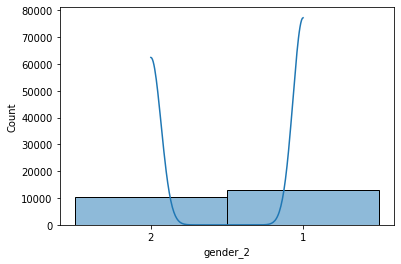

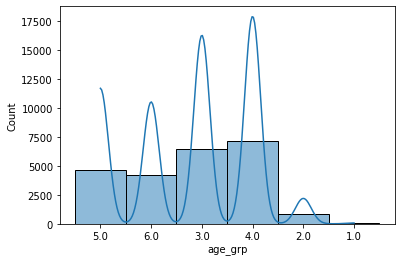

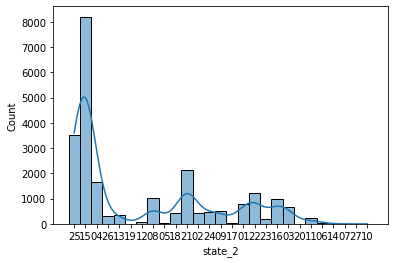

In [ ]:
# Gráficos Histograma
for var in cat_vars:
  sns.histplot(clients_tr[var], kde=True)
  plt.show()

## Regressão Logística

In [ ]:
#cl_tr["is_churn"]= cl_tr["is_churn"].astype(bool)
cl_tr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23292 entries, cx05072 to cx00861
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender_2  23292 non-null  object 
 1   age_grp   23292 non-null  float64
 2   state_2   23292 non-null  object 
 3   is_churn  23292 non-null  bool   
dtypes: bool(1), float64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
# converte colunas para int
cl_tr["gender_2"]= cl_tr["gender_2"].astype(int)
# cl_tr["age_grp"]= cl_tr["age_grp"].astype(int)
cl_tr["state_2"]= cl_tr["state_2"].astype(int)
cl_tr["is_churn"]= cl_tr["is_churn"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
cl_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23292 entries, cx05072 to cx00861
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender_2  23292 non-null  int64  
 1   age_grp   23292 non-null  float64
 2   state_2   23292 non-null  int64  
 3   is_churn  23292 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.4+ MB


In [ ]:
#split dataset in features and target variable
feature_cols = ['state_2', 'gender_2', 'age_grp']
X = cl_tr[feature_cols] # Features
y = cl_tr[target] # Target variable


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [ ]:
# fit the model with data
logreg.fit(X,y)


LogisticRegression()

In [ ]:
y_pred=logreg.predict(X)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[19085,     0],
       [ 4207,     0]])

In [ ]:
# visualizando MdC com heatmap 
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

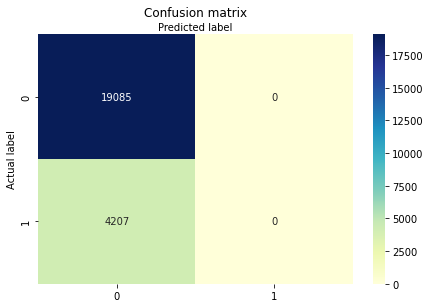

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))

Accuracy: 0.8193800446505238
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Limpeza & Pré-Processamento

Depois de explorar os dados brutos, é importante entender se já existem dados _outliers_ ou errados que corrompem ou invalidam certos registros (linhas da tabela) e que deveriam 1) serem tratados de alguma forma ou 2) eliminados do dataset. Se essa necessidade não surgiu com a EDA, das duas uma: ou não há realmente nada a fazer, ou é necessário explorar mais os dados pra entendê-los.

In [ ]:
''' Espaço reservado para a Solução '''

## *Feature Engineering*

Essa é a etapa que pode dar mais trabalho, devido ao formato de eventos da **tabela de vendas**. Para facilitar um pouco, será dada a seguir uma sugestão de _feature engineering_. Caso haja uma vontade de incluir mais _features_, basta editar o código a seguir.


### Funções Auxiliares

Funções para ajudar nas diferentes ĩdéias de _feature engineering_.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
class OrderAggregatorFeaturesTransform(BaseEstimator, TransformerMixin):
    """ Classe base para FeaturesTransformers que usam os dados de Histórico de Vendas para extrair os dados.
    """
    
    def __init__(self, orders_table, columns=None, product_table=None, imputer=None):
        
        self.work_table = None
        if product_table is not None:
            self.refr_table = pd.merge(
                orders_table,
                product_table.reset_index(),
                on='product_id'
            )
        else:
            self.refr_table = orders_table.copy()
        if columns is not None:
            self.refr_table = self.refr_table[['client_id', *columns]]
        self._reset_database()
        self.imputer = imputer
        self.columns = columns

    def _reset_database(self):
        self.work_table = self.refr_table.copy()
        return self

    def _process_client(self, df):
        return df.set_index('client_id')

    def _select_orders(self, df):
        idx = self.work_table['client_id'].isin(df.index)
        return self.work_table[idx]

    def fit(self, X, y=None, **fit_params):
        if self.imputer is not None:
            self._reset_database()
            self.imputer.fit(self._select_orders(X)[self.columns])
            self.work_table.loc[:, self.columns] = self.imputer.transform(self.work_table[self.columns])
        return self
    
    def transform(self, X):
        return self._select_orders(X).groupby('client_id').apply(self._process_client)

In [ ]:
class UniqueCounterTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = super()._process_client(df)
        return tmp.apply(lambda x: len(x.unique())).rename(index=lambda x: f'count_{x}')

In [ ]:
class SumValuesTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = super()._process_client(df)
        return tmp.sum().rename(index=lambda x: f'sum_{x}')

In [ ]:
class DistributionTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = (super()
               ._process_client(df)
               .describe()
               .drop(index='count')
               .rename(index=lambda c: c.replace('%', 'p')) 
               .rename(index={'mean': 'avg'})
               .unstack())
        tmp.index = tmp.index.map('_'.join)
        return tmp

In [ ]:
class CountStateMatchesTransform(OrderAggregatorFeaturesTransform):
    
    def _process_client(self, df):
        tmp = df.set_index('client_id')[['state', 'delivery_state']]
        return pd.Series({
            'count_orders_states_eq': (tmp.state == tmp.delivery_state).sum(),
            'count_orders_states_ne': (tmp.state != tmp.delivery_state).sum()
        })

    def transform(self, X):
        return (
            pd.merge(
                self._select_orders(X),
                X[['state']].reset_index(),
                on='client_id'
            ).groupby('client_id').apply(self._process_client)
        )

### Sugestão de Feature Engineering		

Algumas features interessantes para serem extraidas dos dados, por cliente, estão mostradas a seguir.

- `gender_g1`: __bool_ calculada a partir do `gender`
- `client_age`: calculada a partir do `birthdate`

- `sum_units`: total de itens comprados em 2019
- `sum_volume`: total gasto em compras em 2019

- `count_orders_states_ne`: quantidade de compras entregando em estados diferentes ao do cliente
- `count_orders_states_eq`: quantidade de compras entregando em estados iguais ao do cliente

- `count_product_id`: quantidade de produtos diferentes presentes nas compras
- `count_device`: quantidade de produtos diferentes presentes nas compras
- `count_source`: quantidade de produtos diferentes presentes nas compras
- `count_payment_method`: quantidade de meios de pagamento em compras

- `count_category_lv0`: quantidade de categorias diferentes (nível 0) em compras
- `count_category_lv1`: quantidade de categorias diferentes (nível 1) em compras
- `count_category_lv2`: quantidade de categorias diferentes (nível 2) em compras
- `count_category_lv3`: quantidade de categorias diferentes (nível 3) em compras
- `count_category_lv4`: quantidade de categorias diferentes (nível 4) em compras

- `price_avg`: média dos preços pagos em cada item comprado
- `price_std`: desvio padrão dos preços pagos em cada item comprado
- `price_min`: mínimo dos preços pagos em cada item comprado
- `price_25p`: quartil 25% dos preços pagos em cada item comprado
- `price_50p`: quartil 50% dos preços pagos em cada item comprado
- `price_75p`: quartil 75% dos preços pagos em cada item comprado
- `price_max`: máximo dos preços pagos em cada item comprado

- `delivery_days_avg`: média da quantidade de dias para entregar (prazo)
- `delivery_days_std`: desvio padrão da quantidade de dias para entregar (prazo)
- `delivery_days_min`: mínimo da quantidade de dias para entregar (prazo)
- `delivery_days_25p`: quartil 25% da quantidade de dias para entregar (prazo)
- `delivery_days_50p`: quartil 50% da quantidade de dias para entregar (prazo)
- `delivery_days_75p`: quartil 75% da quantidade de dias para entregar (prazo)
- `delivery_days_max`: máximo da quantidade de dias para entregar (prazo)

- `installments_avg`: média da quantidade de parcelas de pagamento
- `installments_std`: desvio padrão da quantidade de parcelas de pagamento
- `installments_min`: mínimo da quantidade de parcelas de pagamento
- `installments_25p`: quartil 25% da quantidade de parcelas de pagamento
- `installments_50p`: quartil 50% da quantidade de parcelas de pagamento
- `installments_75p`: quartil 75% da quantidade de parcelas de pagamento
- `installments_max`: máximo da quantidade de parcelas de pagamento

In [ ]:
class FeatureEngineeringTransform(BaseEstimator, TransformerMixin):

    def __init__(self, orders_table, product_table):
        orders_table['volume'] = orders_table.units * orders_table.price
        self._transf_sum = SumValuesTransform(orders_table=orders_table, columns=['units', 'volume'])
        self._transf_stt = CountStateMatchesTransform(orders_table=orders_table[['client_id', 'delivery_state']])
        self._transf_cnt = UniqueCounterTransform(
            orders_table=orders_table, 
            product_table=product, 
            columns=['product_id', 'device', 'source', 'payment_method', 
                     'category_lv0', 'category_lv1', 'category_lv2', 'category_lv3', 'category_lv4']
        )
        self._transf_dst_med = DistributionTransform(
            orders_table=orders_table, 
            product_table=product, 
            columns=['price', 'delivery_days'],
            imputer=SimpleImputer(strategy='median')
        )
        self._transf_dst_one = DistributionTransform(
            orders_table=orders_table, 
            product_table=product, 
            columns=['installments'],
            imputer=SimpleImputer(strategy='constant', fill_value=1)
        )
        
    def fit(self, X, y=None, **fit_params): 
        self._transf_dst_med.fit(X)
        self._transf_dst_one.fit(X)
        return self
    
    def transform(self, X):
        output = (X[['gender']] == 'cg1').rename(columns={'gender': 'gender_cg1'})
        output['client_age'] = 2021 - X.birthdate.dt.year
        output = output.join(self._transf_sum.transform(X))
        output = output.join(self._transf_stt.transform(X))
        output = output.join(self._transf_cnt.transform(X))
        output = output.join(self._transf_dst_med.transform(X))
        output = output.join(self._transf_dst_one.transform(X))
        return output

In [ ]:
%%time
feateng = FeatureEngineeringTransform(orders, product).fit(clients_tr)

CPU times: user 832 ms, sys: 90.4 ms, total: 923 ms
Wall time: 941 ms


In [ ]:
feateng

AttributeError: ignored

AttributeError: ignored

In [ ]:
%%time
train_dataset = feateng.transform(clients_tr)

CPU times: user 8min 11s, sys: 7.64 s, total: 8min 19s
Wall time: 8min 14s


In [ ]:
train_dataset.to_csv('data/client.train.features.v1.csv')

In [ ]:
%%time
test_dataset = feateng.transform(clients_te)

In [ ]:
test_dataset.to_csv('data/client.test.features.v1.sv')

## Análise Exploratória nas Novas _Features_


Regra de Ouro aqui: **cada vez que forem criadas _features_** nas etapas de _feature engineering_, deve ser feita uma **análise exploratória** para entender as distribuições dos dados. Novos dados trazem novos ângulos para  o problema e esses novos ângulos quase sempre trazem novas informações sobre o problema.

Importante: se fizer sentido, pode-se adicionar mais uma etapa de **limpeza e pré-processamento** dos dados.

In [ ]:
''' Espaço reservado para a Solução '''

## Treinar um Modelo Baseline

Antes de começar a treinar modelos muito complexos, sempre é interessante verificar **se um modelo mais simples já resolve**. Além da vantagem de adquirir mais conhecimento sobre o problema, com modelos simples como [árvores de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) ou uma boa [regressão logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) trazem bons insights sobre o que o modelo aprendeu sobre o problema durante  o treinamento. Com sorte, também é possível ter maior compreensao sobre o **impacto direto de cada _feature_** na decisão de saída do modelo, trazendo uma dimensão de explicabilidade para a solução.


O modelo baseline deve ser avaliado em termos de performance de classificação usando métricas como **F-Score**, **precision**, **recall** e _frameworks_ de avaliação como a **matriz de confusão** e a **curva ROC**. Essas medidas **devem ser colocadas em uma tabela** identificada na primeira linha como **_benchmark_** para que, cada vez que se treinar outro modelo, esse modelo possa ser comparado nessas mesmas métricas com os outros. Um exemplo de tabela de comparação de resultados de modelos está [nessa aula de Balanceamento de _Datasets_](https://docs.google.com/presentation/d/1Y4ORsMqnlP2mYbYG30JwHl_VkIGB0XBdO_D8LmK1OAw/edit?usp=sharing) no **slide 124**.


Importantíssimo: deve-se **sempre verificar se houve _overfit_ ou _underfit_** no treinamento. Uma forma fácil de fazer isso é **comparando métricas de treino e de teste** do mesmo modelo treinado. Assim, fica fácil entender se é necessário resolver problemas de **viés** ou de **variância** nas próximas iterações da construção da solução. 


Um último lembrete: **sempre comparar modelos sobre a mesma massa de teste**. Por esse motivo, o desafio já fornece os dados de teste em um arquivo separado, mas é importantíssimo comparar modelos diferentes sobre o **teste**, que na teoria é um _proxy_ do funcionamento do modleo no mundo real.

In [ ]:
''' Espaço reservado para a Solução '''

## Treinar Modelos mais Complexos

Após treinar um modelo **_baseline_** e comprender se o problema tem questões de **viés** ou de **variância** (ou ambos) a serem resolvidos, a idéia é treinar modelos mais complexos (e mais fortes) para maximizar a performance da solução. Como os modelos clássicos de _ensemble_ conseguem resolver esses tipos de problemas (e são modelos complexos por si), fica como sugestão a referência da [aula de _Ensembles_](https://docs.google.com/presentation/d/12zwm_gdUrxlY2YpFYTOOPqacyZg_FKqwNaOXGSn6idM/edit?usp=sharing), que sugere os tipos certos de modelos para cada problema.

Algumas sugestões de modelos a serem treinados:

- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): _ensemble_ de árvores de decisão do tipo **_bagging_**, diminuem **variância**
- [Gradient Boosted Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html): _ensemble_ de árvores de decisão do tipo **_boosting_**, diminuem **variância** e **viés**
- [Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html): modelo com foco na otimização da separação entre as classes, muito eficientes em classificação binária

Lembrando de sempre armazenar na **tabela de resultados** as métricas de cada modelo treinado.


In [ ]:
''' Espaço reservado para a Solução '''

## Agrupando Modelos em um *Ensemble*

Com vários modelos treinados, é interessante treinar um [_ensemble_ do tipo _stacking_](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html) com os modelos mais promissores dentre os treinados. 


Antes de treinar o _stacking_, deve-se buscar entender **quais modelos são interessantes** para compor esse _ensemble_, já que há bastante custo computacional envolvido em combinar modelos. Uma técnica interessante é **verificar quais modelos são mais complementares** e qual combinação de modelos teria o **potencial ótimo**, i.e. o maior ganho teórico. A primeira parte da [aula de _Ensembles_](https://docs.google.com/presentation/d/12zwm_gdUrxlY2YpFYTOOPqacyZg_FKqwNaOXGSn6idM/edit?usp=sharing) mostra esse racional no **slide 22**.




In [ ]:
''' Espaço reservado para a Solução '''

## Envio das Previsões do Desafio

Após o treinamento, é interessante fazer uma análise da **tabela de resultados** atualizada e compreender a evolução das soluções. Depois, **escolher a melhor solução** e enviar os resultados do modelo sobre os dados em `clients.challenge` para a competição de modelos por [esse formulário]().

O **formato do arquivo** que deve ser submetido é uma tabela com duas colunas:
- `client_id`: todos os IDs de cliente do arquivo *clients.challenge.csv*
- `is_churn`: decisão sobre cada cliente; apenas será aceito o formato binário, com saída igual a `True` ou `False`.

**IMPORTANTE**: por limitações do formulário, o arquivo deve ter extensão `.txt` se for do tipo CSV ou `xls` (ou `xlsx`) se for uma planilha do excel.

In [ ]:
''' Espaço reservado para a Solução '''

## Insights & Levantamento de Hipóteses

Durante o desenvolvimento das soluções e as explorações, é muito provável que alguns _insights_ e hipóteses tenham surgido. Nessa última etapa é o momento de escrever eses pontos de forma estruturada e preparar o **banco de hipóteses** para mais uma rodada de solução. Afinal, se há espaço para melhoras, esse banco pode ser uma fonte de boas idéias de onde começar.